# Play with Roots

In [1]:
using Roots
using Plots
pyplot()

Plots.PyPlotBackend()

## Bracketing

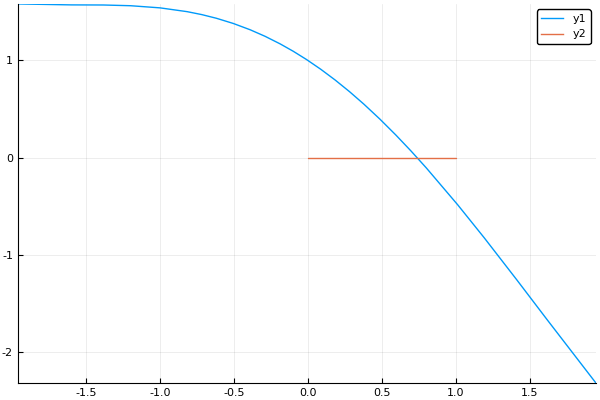

In [6]:
f(x) = cos(x) - x
plot(f, -2, 2)
plot!([0, 1], [0, 0])

In [7]:
x = find_zero(f, (0, 1), Bisection())
x, f(x)

(0.7390851332151607, 0.0)

In [12]:
f(x) = sin(x)
x = find_zero(f, (π/2, 3π/2))
x, f(x)

(3.141592653589793, 1.2246467991473532e-16)

In [15]:
f(x) * f(prevfloat(x)), f(x) * f(nextfloat(x))

(6.938284076449422e-32, -3.9387645111257066e-32)

In [18]:
x = find_zero(x -> 1/x, (-1, 1))
1/x

-Inf

In [20]:
f(x) = Inf * sign(x)
x = find_zero(f, (-Inf, Inf))
x, f(x)

(0.0, NaN)

In [23]:
x = find_zero(sin, (big(3), big(4)))
x, sin(x)

(3.141592653589793238462643383279502884197169399375105820974944592307816406286198, 1.096917440979352076742130626395698021050758236508687951179005716992142688513354e-77)

## Using an Initial Guess

In [30]:
f(x) = cos(x) - x
x = find_zero(f, 1)
x, f(x)

(0.7390851332151607, 0.0)

In [32]:
f(x) = x^3 - 2x - 5
x = find_zero(f, 2)
x, f(x)

(2.0945514815423265, -8.881784197001252e-16)

# z-Transform Examples

In [1]:
using PolynomialRoots
using DSP

In [24]:
# Example LTI System
include("common.jl")

# Filter coefficients, high power to low
a = [1, -1, 1/2]
b = [1, 3, 11/4, 3/4]

Commons included


4-element Array{Float64,1}:
 1.0 
 3.0 
 2.75
 0.75

In [25]:
roots(reverse(b))

3-element Array{Complex{Float64},1}:
 -1.5+0.0im
 -1.0-0.0im
 -0.5+0.0im

In [26]:
roots(reverse(a))

2-element Array{Complex{Float64},1}:
 0.5+0.5im
 0.5-0.5im

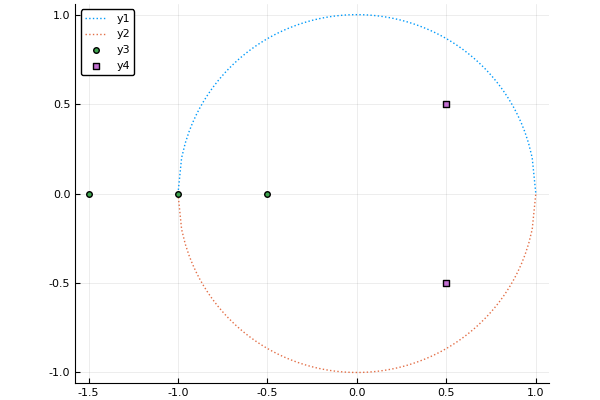

In [27]:
plt = zplane(roots(reverse(b)), roots(reverse(a)))

In [29]:
f = PolynomialRatio(b, a)

DSP.Filters.PolynomialRatio{Float64}(Poly(0.75 + 2.75*x + 3.0*x^2 + 1.0*x^3), Poly(0.5 - 1.0*x + 1.0*x^2))

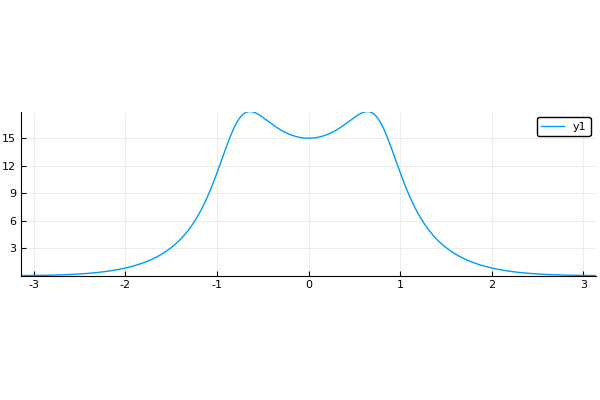

In [72]:
omega = [-π:0.01:π]
Hz = freqz(f, omega)
plot(omega, abs.(Hz[1]), aspect_ratio=1/10)

## Chirp Input Signal

In [31]:
using PortAudio
using LibSndFile

In [52]:
stream = PortAudioStream(samplerate=4000)

PortAudio.PortAudioStream{Float32}
  Samplerate: 4000.0Hz
  Buffer Size: 4096 frames
  2 channel sink: "default"
  2 channel source: "default"

In [55]:
# Chirp
N = 8000
n = 0:N-1
chirp = 0.5 * cos.(2π / 40000 * n.^2)
write(stream, chirp)

8000

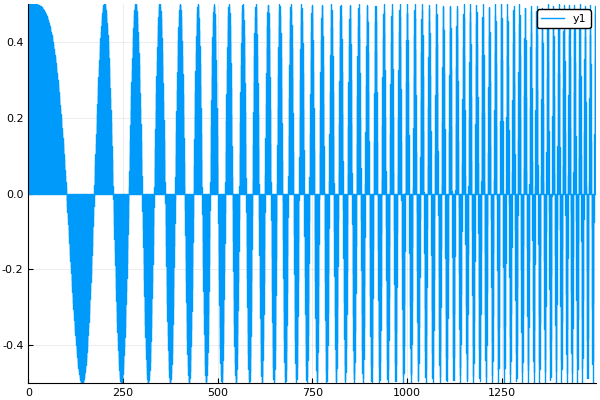

In [57]:
plot(n[1:1500], chirp[1:1500], seriestype=:stem)

In [58]:
y = filt(f, chirp)

8000-element Array{Float64,1}:
  0.5       
  2.5       
  5.625     
  8.125     
  9.0625    
  8.74999   
  7.96871   
  7.34367   
  7.10922   
  7.18722   
  7.38235   
  7.53833   
  7.59656   
  ⋮         
 -0.0778386 
  0.0822504 
 -0.0549217 
  0.00650117
  0.0442912 
 -0.0779096 
  0.0814982 
 -0.0537897 
  0.00552632
  0.0447236 
 -0.0777171 
  0.0809001 

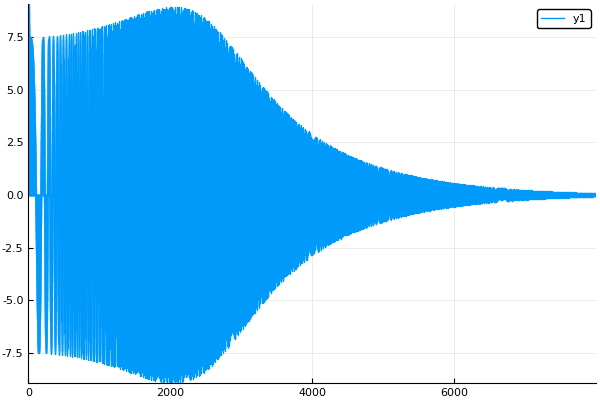

In [60]:
plot(n[1:end], y[1:end], seriestype=:stem)

In [61]:
write(stream, y)

8000

In [64]:
chirp2 = [chirp; reverse(chirp)]

16000-element Array{Float64,1}:
 0.5     
 0.5     
 0.5     
 0.5     
 0.499998
 0.499996
 0.499992
 0.499985
 0.499975
 0.49996 
 0.499938
 0.49991 
 0.499872
 ⋮       
 0.49991 
 0.499938
 0.49996 
 0.499975
 0.499985
 0.499992
 0.499996
 0.499998
 0.5     
 0.5     
 0.5     
 0.5     

In [69]:
write(stream, chirp2)

16000

In [67]:
y2 = filt(f, chirp2)

16000-element Array{Float64,1}:
 0.5    
 2.5    
 5.625  
 8.125  
 9.0625 
 8.74999
 7.96871
 7.34367
 7.10922
 7.18722
 7.38235
 7.53833
 7.59656
 ⋮      
 7.49793
 7.49854
 7.499  
 7.49935
 7.4996 
 7.49977
 7.49989
 7.49995
 7.49999
 7.5    
 7.50001
 7.5    

In [68]:
write(stream, y2)

16000